# Fast Fourier Transform

RXTE observation of Hercules X-1 (which is an HMXB system) is given as data. 

1. I am required to plot the lightcurve  (i.e. number of photons detected per unit time vs time). 
2. Next step is to compute the FFT of the given time-series and plot its absolute value against frequency.
3. Searching for any periodic signals
4. To find the spin period of the pulsar (that is, the lowest frequency signal
5. Identify other periodic signals and how they are related to the lowest frequency signal?

Text(0.5, 1.0, 'Lightcurve of Hercules X-1')

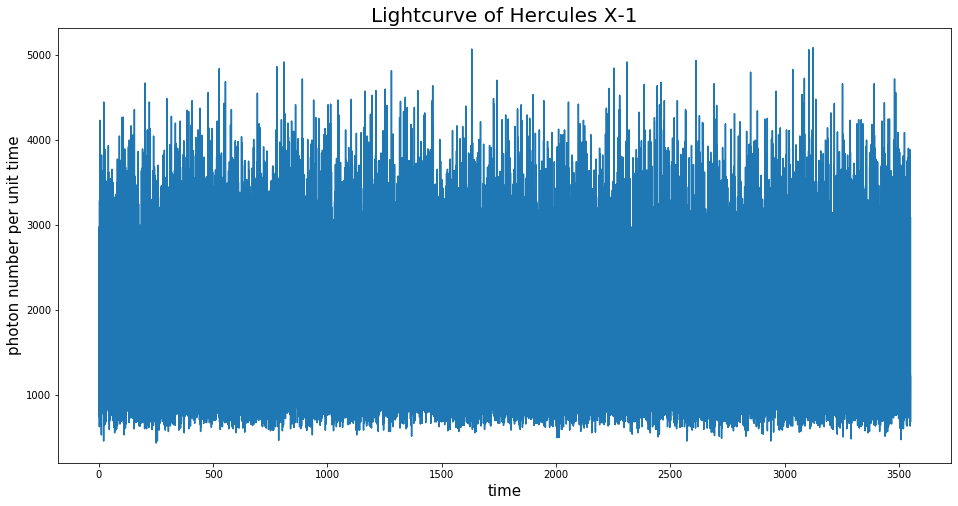

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#reading data from the file
data      = np.loadtxt('/home/uddeepta/Desktop/ICTS/project_GW/computation/extracted_lightcurve_HerX-1.dat')
time      = data[:,0]
countrate = data[:,1]

#plotting the lightcurve
plt.figure(figsize=(16,8))
plt.plot(time, countrate)
plt.xlabel('time',fontsize = 15)
plt.ylabel('photon number per unit time', fontsize = 15)
plt.title('Lightcurve of Hercules X-1', fontsize = 20)

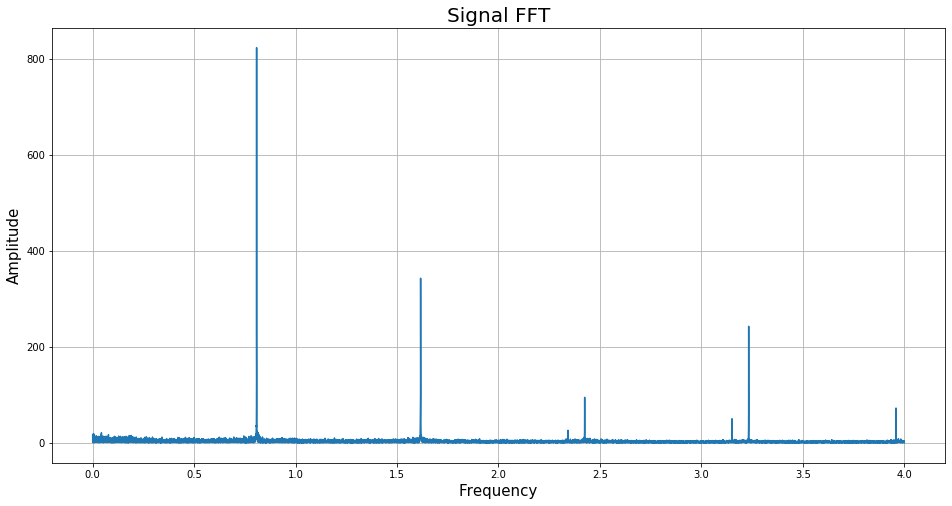

In [70]:
from numpy.fft import fft

FFT = fft(countrate)
# Number of sample points
N = len(time)
# Sample spacing
T    = time[1]-time[0]
freq = np.linspace(0.0, 1.0/(2.0*T), N//2)

#plotting absolute value of FFT against frequency
plt.figure(figsize=(16,8))
plt.plot(freq[1:], 2.0/N * np.abs(FFT[1:N//2])) #ignoring the first element
plt.grid()
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.title('Signal FFT',fontsize=20)
plt.show()


In [113]:
#extracting all and highest frequencies
#this will allow to see periodicity in the signals

m1 = freq[1:]
m2 = 2.0/N * np.abs(FFT[1:N//2])

threshold = 55
maxim = m2[0] #this will store the maximum value of the amplitude
compl = m1[0] #this will store the maximum value of the frequency
fr = [] #this will store all the frequencies above threshold value of the amplitude

for i in range(len(m1)):
    if m2[i] > threshold:
        fr.append(m1[i])
    if m2[i] > maxim:
        maxim = m2[i]
        compl = m1[i]

print("The maximum frequency is =" ,compl, "\n")
print("These are the frequency signals: \n",fr)

The maximum frequency is = 0.8082262805573733 

These are the frequency signals: 
 [0.8076628603548237, 0.8079445704560985, 0.8082262805573733, 0.8085079906586481, 0.8087897007599228, 0.8090714108611976, 1.615889140912197, 1.6161708510134718, 1.6164525611147467, 1.6167342712160213, 1.6170159813172962, 2.4246788416721197, 2.4249605517733945, 3.2329051222294933, 3.2331868323307678, 3.2334685424320426, 3.9591537633159026]


In [116]:
#To get the value of spin frequency of the pulsar

imax=50
ymax=m2[imax]
for i in range(len(freq)//8,len(freq)//4):
    if (m2[i]>=ymax):
        imax=i
        ymax=m2[imax]
print("The spin period of the pulsar is: ", 1.0/freq[imax], "units of time")    

The spin period of the pulsar is:  1.2377086703305438 units of time
